In [1]:
import nltk
from  nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random


In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\nuzha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

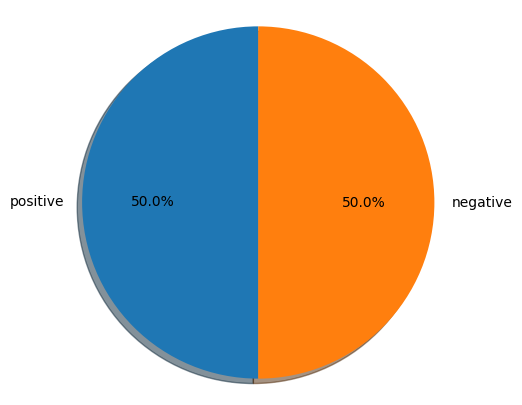

In [8]:
# select the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_tweets = twitter_samples.strings('negative_tweets.json')

fig = plt.figure(figsize=(5, 5))  
labels = 'positive', 'negative'

sizes= [len(positive_tweets), len(negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show() 

In [16]:
#Looking at raw text of positive and negative tweets
print("\n Sample Positive tweets:\n", positive_tweets[random.randint(0,500)])


 Sample Positive tweets:
 Hi BAM ! @BarsAndMelody 
Can you follow my bestfriend @969Horan696 ? 
She loves you a lot :) 
See you in Warsaw &lt;3 
Love you &lt;3 x43


In [17]:
#download the stopwords from NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nuzha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


In [30]:
# remove hyperlinks, twitter marks and styles
import contractions 
def process_tweet1(tweet):
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = contractions.fix(tweet)
  return tweet

cleaned_pos_tweet = [process_tweet1(tweet) for tweet in positive_tweets]
cleaned_neg_tweet = [process_tweet1(tweet) for tweet in negative_tweets] 

In [33]:
# Tokenizing, removing stopwords and punctuation and stemming
stopwords_english = stopwords.words('english')
def process_tweet2(tweet):
  tweet = tweet
  tokennizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  tweet = tokennizer.tokenize(tweet)

  tweet = [word for word in tweet if word not in stopwords_english and word not in string.punctuation]
  stemmer = PorterStemmer()
  tweet = [stemmer.stem(word) for word in tweet]

  return tweet


cleaned_neg_tweet1 = [process_tweet2(tweet) for tweet in cleaned_neg_tweet]
cleaned_pos_tweet1 = [process_tweet2(tweet) for tweet in cleaned_pos_tweet]

print("\n Sample Positive tweets after processing:\n", cleaned_pos_tweet1[random.randint(0,500)])
print("\n Sample Negative tweets after processing:\n", cleaned_neg_tweet1[random.randint(0,500)])


 Sample Positive tweets after processing:
 ['great', 'talk', ':d']

 Sample Negative tweets after processing:
 ['mom', 'far', 'away', ':(']
